# Requirements

In [74]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [75]:
# Add as many imports as you need.

## Blood Pressure Analysis


# Dataset Description

## Attributes

* id - patient identifier
* age - patient age
* height - patient height in cm
* weight - patient weight in kg
* blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - does patient have dental caries

### Target variable
* blood - patient systolic blood pressure

# Read the dataset

In [76]:
data = pd.read_csv("./data/blood_pressure_data.csv")

Explore the dataset using visualizations of your choice.

In [77]:
# Write your code here. Add as many boxes as you need.

In [78]:
data.sample(5)

,id,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
6562,NaN,4/18/1964,175.0,70.0,78.0,97.0,172.0,NORMAL,53.0,89.0,NaN,1.0,0.9,NaN,18.0,36.0,No,110.0
3338,37397.0,2/15/1979,NaN,65.0,NaN,103.0,206.0,UNK,48.0,127.0,15.7,1.0,1.0,19.0,22.0,34.0,No,125.0
9531,100979.0,NaN,160.0,50.0,65.0,NaN,207.0,HiGH,NaN,NaN,12.7,1.0,0.9,22.0,NaN,16.0,No,105.0
3077,72348.0,8/1/1964,155.0,50.0,78.0,NaN,NaN,LOW,69.0,116.0,NaN,1.0,0.8,35.0,19.0,16.0,No,130.0
6271,52182.0,4/30/1979,155.0,NaN,67.0,107.0,228.0,LOW,59.0,152.0,NaN,1.0,NaN,28.0,27.0,32.0,No,103.0


In [79]:
data.sample(5)

,id,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
7859,NaN,6/10/1984,NaN,NaN,66.0,75.0,176.0,LOW,NaN,101.0,NaN,2.0,0.7,12.0,9.0,NaN,No,NaN
6770,139734.0,NaN,165.0,70.0,NaN,85.0,NaN,HiGH,74.0,NaN,NaN,1.0,0.7,NaN,17.0,168.0,No,NaN
2465,1895.0,11/30/1993,NaN,60.0,70.0,94.0,153.0,LOW,46.0,92.0,17.0,1.0,NaN,24.0,16.0,23.0,No,114.0
95,127636.0,NaN,175.0,100.0,NaN,NaN,193.0,NORMAL,50.0,121.0,15.7,NaN,NaN,NaN,35.0,109.0,Yes,118.0
3661,54064.0,3/10/1969,155.0,55.0,66.0,93.0,240.0,LOW,NaN,148.0,NaN,1.0,0.6,21.0,NaN,13.0,Yes,105.0


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [80]:
data_copy

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,45.0,180.0,65.0,70.0,95.0,149.0,2.0,55.0,87.0,13.9,1.0,0.9,19.0,21.0,25.0,0.0,112.0
1,45.0,150.0,50.0,88.0,92.0,219.0,2.0,55.0,137.0,13.2,1.0,0.6,26.0,17.0,25.0,0.0,138.0
2,70.0,175.0,75.0,77.0,95.0,217.0,3.0,50.0,142.0,14.7,1.0,0.8,22.0,22.0,25.0,0.0,137.0
3,40.0,160.0,65.0,77.0,100.0,160.0,1.0,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,0.0,133.0
6,60.0,155.0,50.0,74.0,95.0,197.0,2.0,59.0,115.0,13.5,1.0,0.7,44.0,28.0,17.0,0.0,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45.0,180.0,75.0,69.0,100.0,180.0,0.0,76.0,98.0,14.7,1.0,0.8,29.0,39.0,73.0,0.0,120.0
9996,45.0,160.0,65.0,72.0,100.0,197.0,3.0,55.0,99.0,15.3,1.0,0.7,22.0,49.0,91.0,0.0,110.0
9997,35.0,165.0,65.0,72.0,83.0,207.0,2.0,65.0,134.0,14.7,1.0,0.9,20.0,21.0,23.0,0.0,128.0
9998,45.0,160.0,75.0,82.0,88.0,197.0,1.0,63.0,112.0,14.4,1.0,0.9,18.0,15.0,64.0,0.0,121.0


In [81]:
data.isnull().sum()

id                  2672
age                 2688
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

In [82]:
data_copy = data.copy()
data_copy.drop('id', axis=1, inplace=True)

In [83]:
data_copy = data.copy()
data_copy.drop('id', axis=1, inplace=True)

In [84]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               7312 non-null   object 
 1   height(cm)        7373 non-null   float64
 2   weight(kg)        7444 non-null   float64
 3   relaxation        7425 non-null   float64
 4   blood sugar       7438 non-null   float64
 5   Cholesterol       7386 non-null   float64
 6   triglyceride      8644 non-null   object 
 7   HDL               7391 non-null   float64
 8   LDL               7358 non-null   float64
 9   hemoglobin        7417 non-null   float64
 10  Urine protein     7475 non-null   float64
 11  serum creatinine  7433 non-null   float64
 12  AST               7427 non-null   float64
 13  ALT               7416 non-null   float64
 14  Gtp               7411 non-null   float64
 15  dental caries     10000 non-null  object 
 16  blood pressure    7477 non-null   float64

In [85]:

new_age = []

for x in range(len(data_copy['age'])):
    age = pd.to_datetime(data_copy['age'][x])
    year = datetime.today().year - age.year
    new_age.append(year)


In [86]:

new_age = []

for x in range(len(data_copy['age'])):
    age = pd.to_datetime(data_copy['age'][x])
    year = datetime.today().year - age.year
    new_age.append(year)


In [87]:
from datetime import datetime

year = datetime.today().year
year


2024

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

In [88]:
data_copy['age'] = new_age

In [89]:
data_copy['age'] = new_age

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [90]:
new_age


[nan,
 45,
 70,
 40,
 40,
 nan,
 60,
 35,
 35,
 36,
 nan,
 nan,
 45,
 55,
 51,
 nan,
 60,
 40,
 60,
 nan,
 nan,
 45,
 45,
 60,
 45,
 70,
 50,
 55,
 45,
 40,
 60,
 35,
 nan,
 nan,
 60,
 60,
 nan,
 60,
 40,
 40,
 65,
 55,
 nan,
 nan,
 40,
 50,
 40,
 30,
 nan,
 nan,
 20,
 40,
 40,
 50,
 45,
 nan,
 70,
 45,
 55,
 nan,
 nan,
 nan,
 55,
 60,
 40,
 36,
 61,
 nan,
 nan,
 nan,
 50,
 60,
 20,
 60,
 41,
 40,
 31,
 40,
 nan,
 45,
 40,
 30,
 50,
 nan,
 50,
 nan,
 nan,
 60,
 50,
 55,
 45,
 36,
 55,
 nan,
 25,
 nan,
 nan,
 40,
 nan,
 30,
 41,
 20,
 30,
 40,
 nan,
 nan,
 25,
 40,
 50,
 30,
 55,
 80,
 45,
 41,
 50,
 nan,
 40,
 40,
 60,
 nan,
 20,
 40,
 40,
 nan,
 60,
 60,
 40,
 nan,
 60,
 51,
 30,
 25,
 nan,
 40,
 30,
 70,
 20,
 40,
 nan,
 50,
 35,
 25,
 45,
 60,
 25,
 55,
 40,
 45,
 40,
 60,
 50,
 nan,
 nan,
 75,
 nan,
 50,
 nan,
 nan,
 40,
 70,
 25,
 55,
 nan,
 nan,
 65,
 nan,
 nan,
 60,
 nan,
 45,
 nan,
 nan,
 nan,
 nan,
 nan,
 40,
 35,
 61,
 41,
 nan,
 35,
 40,
 50,
 25,
 60,
 nan,
 45,
 55,
 nan,


In [91]:
# Write your code here. Add as many boxes as you need.

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [92]:
# Write your code here. Add as many boxes as you need.

## Model comparison with cross-validation

Train two models: XGBoost and RandomForest for predicting the target variable. Use 5-fold cross-validation to evaluate the performance of the models and compare them using adrquate metrics.

In [93]:
# Write your code here. Add as many boxes as you need.

# Cross-Validation

In [94]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the models by using different metrics provided by the `scikit-learn` library.

In [95]:
# Write your code here. Add as many boxes as you need.

In [96]:
data_copy

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,NaN,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,112.0
1,45.0,150.0,50.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,138.0
2,70.0,175.0,75.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,137.0
3,40.0,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0
4,40.0,170.0,NaN,68.0,99.0,176.0,LOW,NaN,96.0,13.8,1.0,0.9,33.0,NaN,11.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,180.0,75.0,69.0,100.0,180.0,ABNORMAL,76.0,98.0,14.7,NaN,0.8,29.0,39.0,73.0,No,120.0
9996,NaN,160.0,NaN,72.0,100.0,NaN,NORMAL,NaN,99.0,15.3,1.0,0.7,22.0,49.0,91.0,No,110.0
9997,35.0,165.0,65.0,72.0,83.0,207.0,NaN,65.0,134.0,NaN,1.0,0.9,20.0,21.0,23.0,No,128.0
9998,NaN,160.0,75.0,82.0,88.0,NaN,HiGH,63.0,112.0,14.4,1.0,0.9,18.0,15.0,64.0,No,121.0


In [97]:
data_copy.isnull().sum()

age                 2688
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

In [98]:
data_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               7312 non-null   float64
 1   height(cm)        7373 non-null   float64
 2   weight(kg)        7444 non-null   float64
 3   relaxation        7425 non-null   float64
 4   blood sugar       7438 non-null   float64
 5   Cholesterol       7386 non-null   float64
 6   triglyceride      8644 non-null   object 
 7   HDL               7391 non-null   float64
 8   LDL               7358 non-null   float64
 9   hemoglobin        7417 non-null   float64
 10  Urine protein     7475 non-null   float64
 11  serum creatinine  7433 non-null   float64
 12  AST               7427 non-null   float64
 13  ALT               7416 non-null   float64
 14  Gtp               7411 non-null   float64
 15  dental caries     10000 non-null  object 
 16  blood pressure    7477 non-null   float64

In [99]:
encoder = LabelEncoder()
data_copy['triglyceride'] = encoder.fit_transform(data_copy['triglyceride'])
data_copy['dental caries'] = encoder.fit_transform(data_copy['dental caries'])
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               7312 non-null   float64
 1   height(cm)        7373 non-null   float64
 2   weight(kg)        7444 non-null   float64
 3   relaxation        7425 non-null   float64
 4   blood sugar       7438 non-null   float64
 5   Cholesterol       7386 non-null   float64
 6   triglyceride      10000 non-null  int64  
 7   HDL               7391 non-null   float64
 8   LDL               7358 non-null   float64
 9   hemoglobin        7417 non-null   float64
 10  Urine protein     7475 non-null   float64
 11  serum creatinine  7433 non-null   float64
 12  AST               7427 non-null   float64
 13  ALT               7416 non-null   float64
 14  Gtp               7411 non-null   float64
 15  dental caries     10000 non-null  int64  
 16  blood pressure    7477 non-null   float64

In [100]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [101]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy="median")


<Axes: >

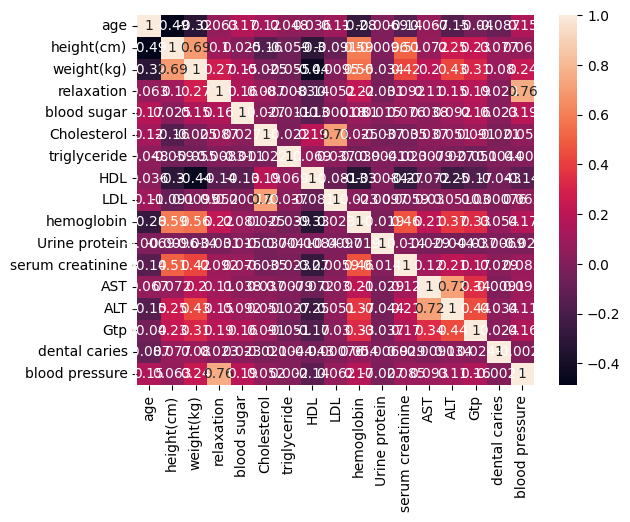

In [102]:
import seaborn as sns
sns.heatmap(data_copy.corr(), annot=True)

In [103]:
import missingno as msno

<Axes: >

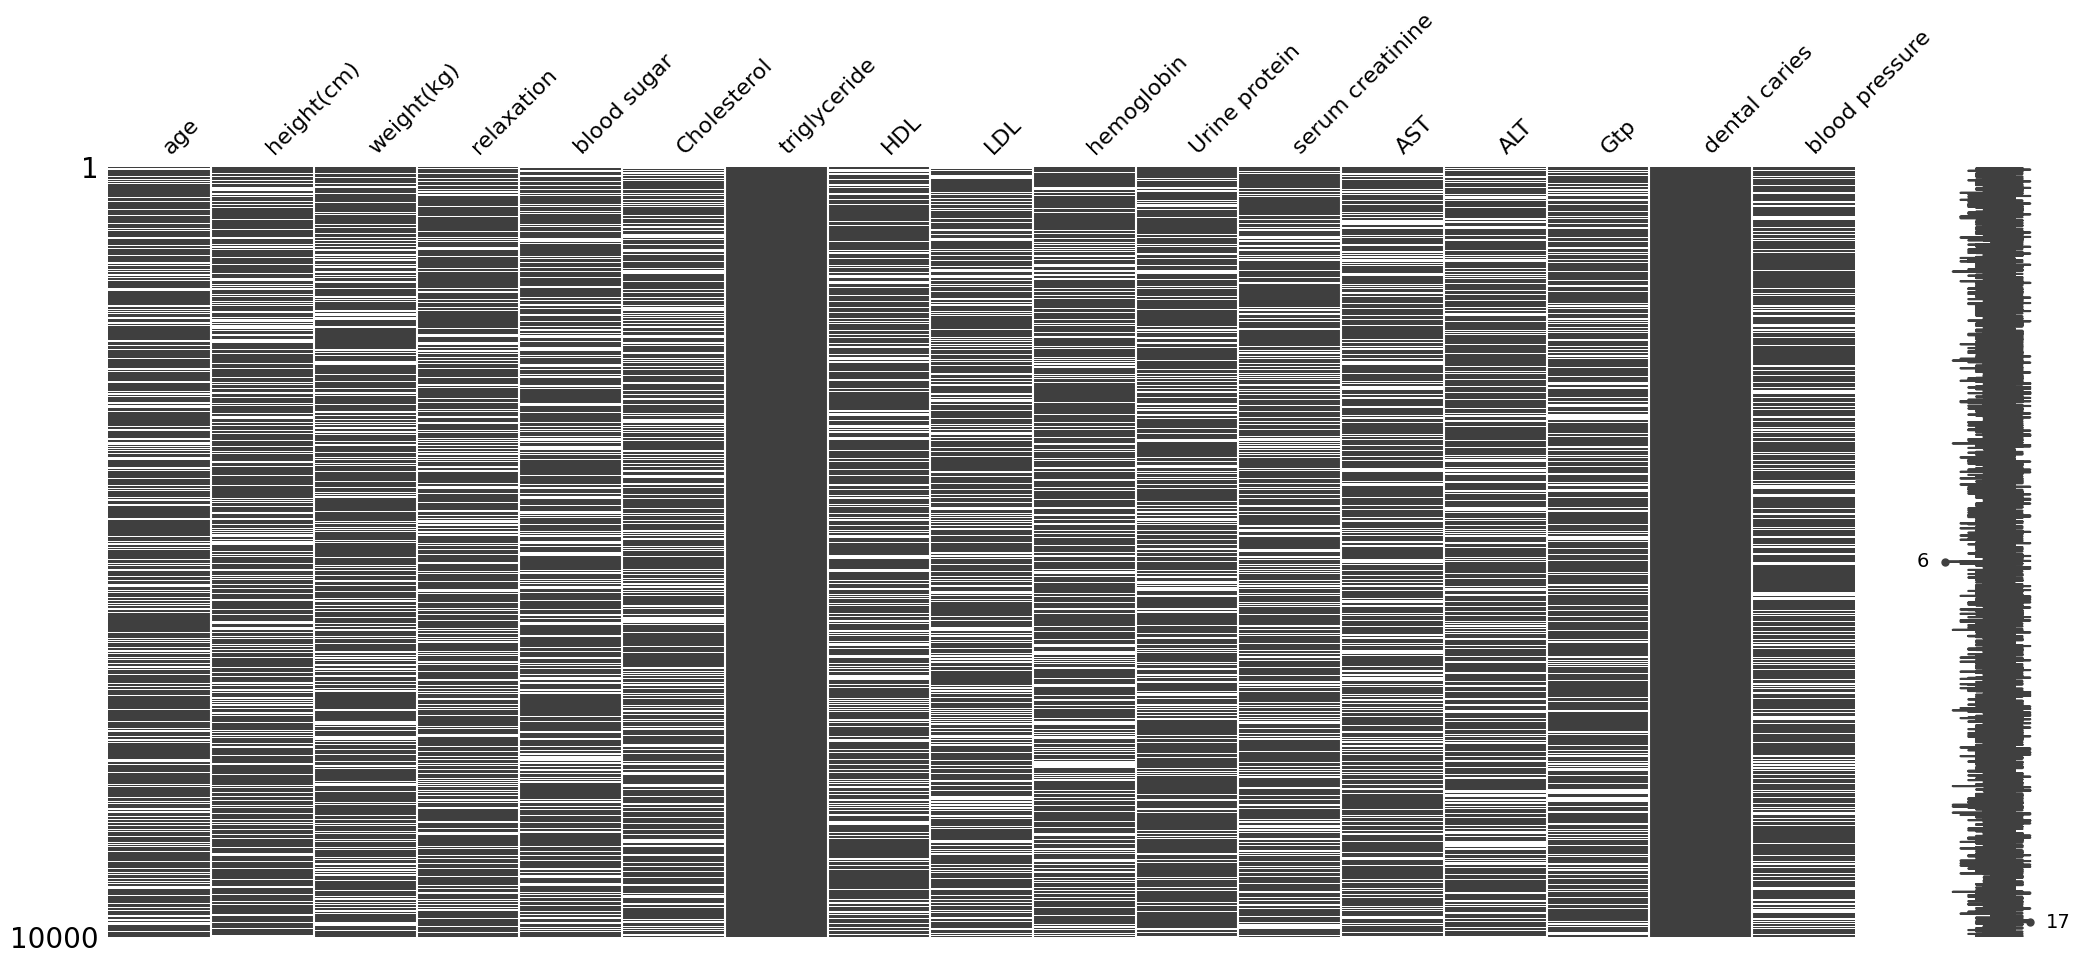

In [104]:
msno.matrix(data_copy)

In [105]:
data_copy.triglyceride

0       5
1       2
2       3
3       1
4       2
       ..
9995    0
9996    3
9997    5
9998    1
9999    4
Name: triglyceride, Length: 10000, dtype: int64

In [106]:
data.triglyceride

0            NaN
1            LOW
2         NORMAL
3           HiGH
4            LOW
          ...   
9995    ABNORMAL
9996      NORMAL
9997         NaN
9998        HiGH
9999         UNK
Name: triglyceride, Length: 10000, dtype: object

In [107]:
import numpy as np

In [108]:
data_copy['triglyceride'] = data_copy['triglyceride'].replace(5, np.nan)

In [109]:
data_copy['triglyceride']

0       NaN
1       2.0
2       3.0
3       1.0
4       2.0
       ... 
9995    0.0
9996    3.0
9997    NaN
9998    1.0
9999    4.0
Name: triglyceride, Length: 10000, dtype: float64

In [110]:
data_copy.isnull().sum()

age                 2688
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

<Axes: >

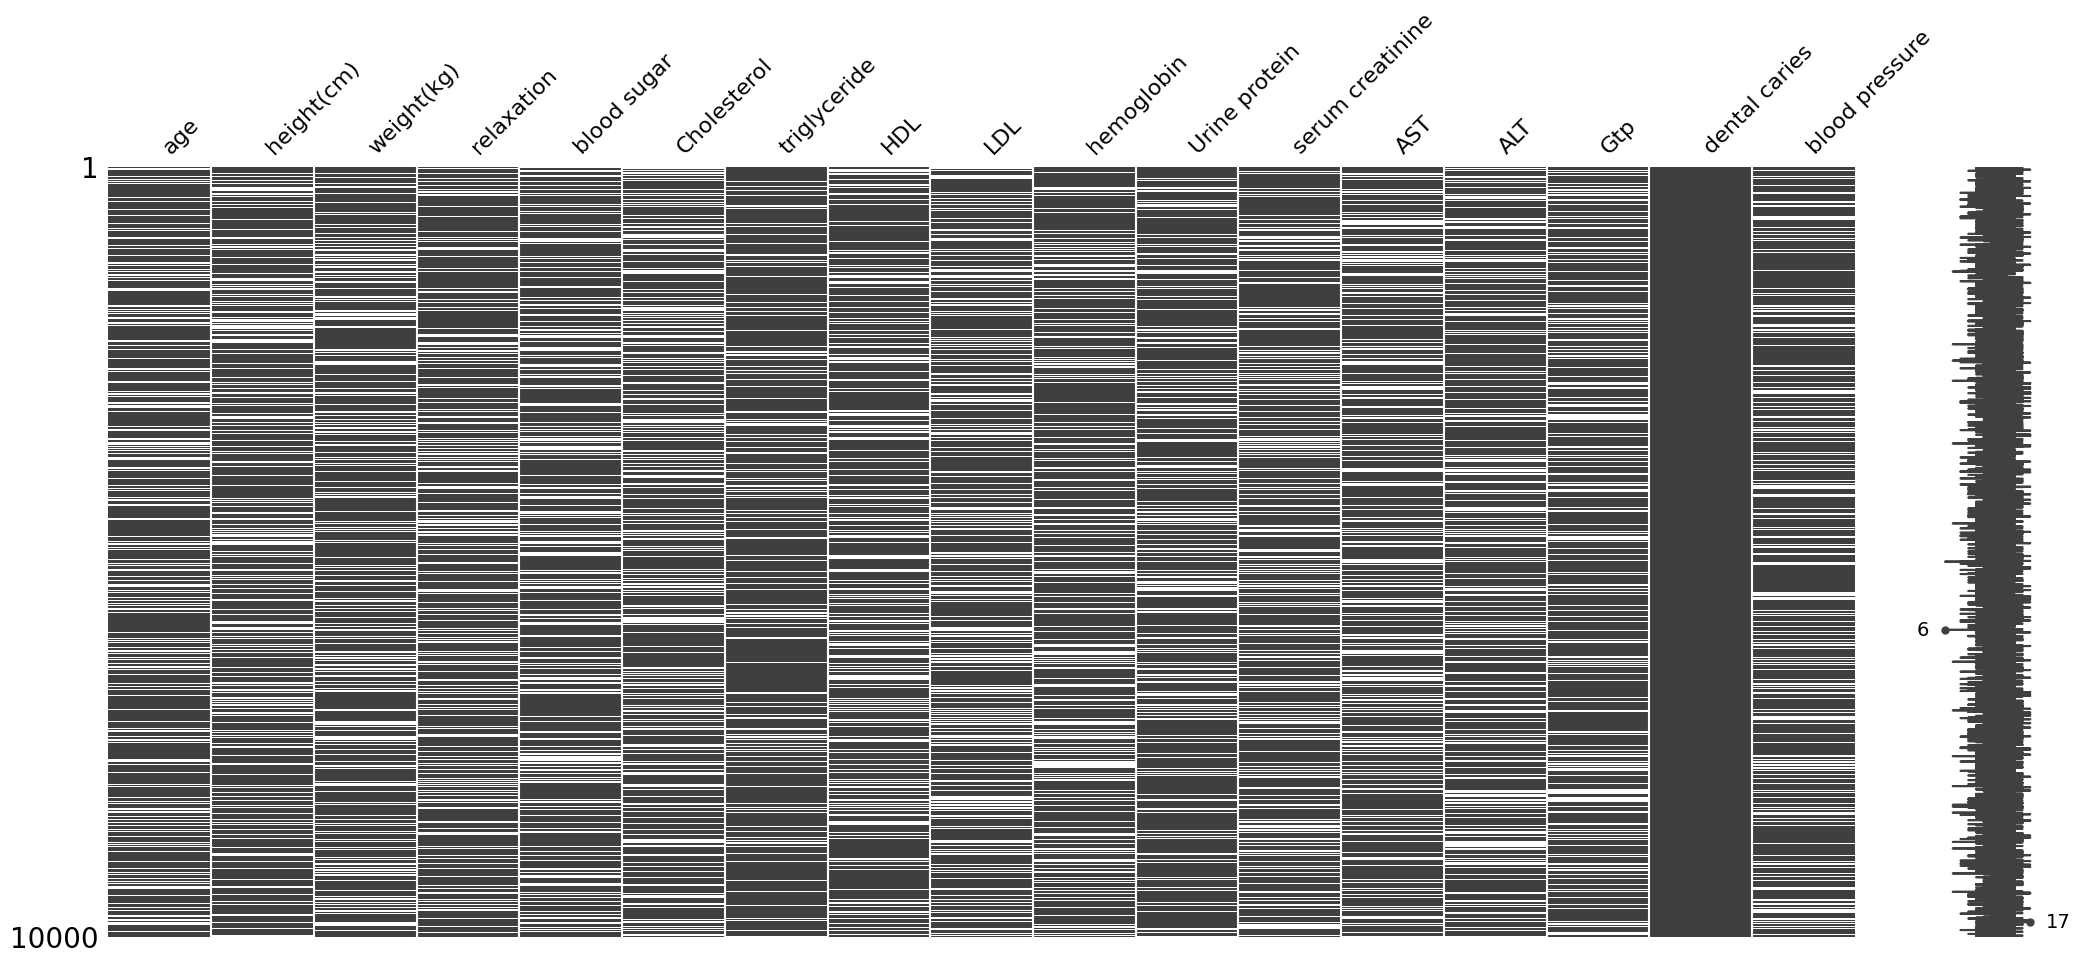

In [111]:
msno.matrix(data_copy)

<Axes: >

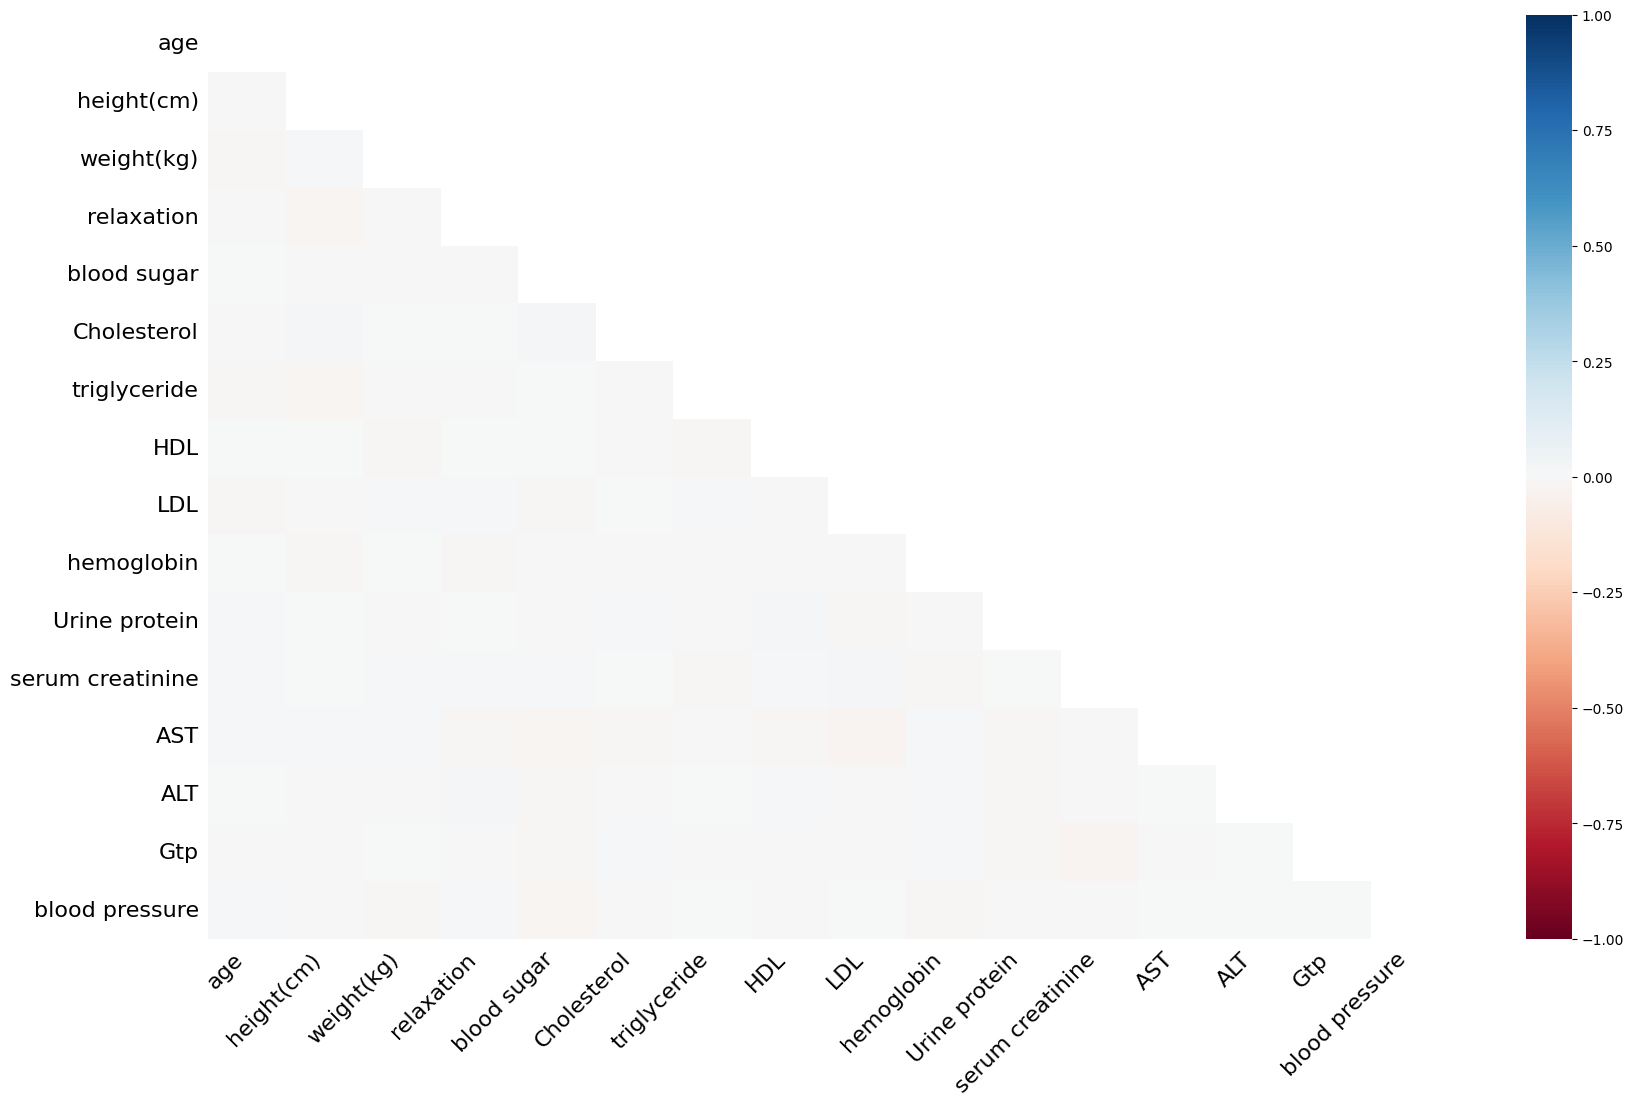

In [112]:
msno.heatmap(data_copy)

In [113]:
median_imputer = SimpleImputer(strategy="median")

In [114]:
median_imputer = SimpleImputer(strategy="median")

In [116]:
data_copy[['age', 'height(cm)', 'weight(kg)', 'relaxation', 'blood sugar', 'Cholesterol', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']] = median_imputer.fit_transform(data_copy[['age', 'height(cm)', 'weight(kg)', 'relaxation', 'blood sugar', 'Cholesterol',  'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']])

In [ ]:
data_copy.info()


In [150]:
data_copy.dropna(subset = ['blood pressure'], inplace=True)

In [ ]:
data_copy.isnull().sum()

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7328 non-null   float64
 1   age               7312 non-null   object 
 2   height(cm)        7373 non-null   float64
 3   weight(kg)        7444 non-null   float64
 4   relaxation        7425 non-null   float64
 5   blood sugar       7438 non-null   float64
 6   Cholesterol       7386 non-null   float64
 7   triglyceride      8644 non-null   object 
 8   HDL               7391 non-null   float64
 9   LDL               7358 non-null   float64
 10  hemoglobin        7417 non-null   float64
 11  Urine protein     7475 non-null   float64
 12  serum creatinine  7433 non-null   float64
 13  AST               7427 non-null   float64
 14  ALT               7416 non-null   float64
 15  Gtp               7411 non-null   float64
 16  dental caries     10000 non-null  object 

In [117]:
from sklearn.impute import KNNImputer

In [123]:
knn_imputer = KNNImputer(n_neighbors=5)
data_copy[['triglyceride']] = knn_imputer.fit_transform(data_copy[['triglyceride']])

In [151]:
data_copy.isnull().sum()

age                 0
height(cm)          0
weight(kg)          0
relaxation          0
blood sugar         0
Cholesterol         0
triglyceride        0
HDL                 0
LDL                 0
hemoglobin          0
Urine protein       0
serum creatinine    0
AST                 0
ALT                 0
Gtp                 0
dental caries       0
blood pressure      0
dtype: int64

In [154]:
x = data_copy.drop('blood pressure', axis=1)
y = data_copy['blood pressure']

In [155]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=2)


In [156]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns )
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns )

In [128]:
from sklearn.model_selection import KFold, RepeatedKFold
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(x, y)

50

In [130]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.8 MB/s eta 0:00:00a 0:00:01


In [157]:
data_copy.isnull().sum()

age                 0
height(cm)          0
weight(kg)          0
relaxation          0
blood sugar         0
Cholesterol         0
triglyceride        0
HDL                 0
LDL                 0
hemoglobin          0
Urine protein       0
serum creatinine    0
AST                 0
ALT                 0
Gtp                 0
dental caries       0
blood pressure      0
dtype: int64

In [158]:
from xgboost import XGBRegressor

model = XGBRegressor(learning_rate = 0.1)


In [159]:
model.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [160]:
# se sto e so drvo povrzano nema potreba od skaliranje

In [161]:
from sklearn.ensemble import RandomForestRegressor

modelrf = RandomForestRegressor()

In [162]:
modelrf.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [163]:
y_pred_xgb = model.predict(x_test_scaled)
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(y_test,y_pred_xgb)
r2_score(y_test,y_pred_xgb)

0.44827949615981655

In [165]:
y_pred_rf = modelrf.predict(x_test_scaled)
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(y_test,y_pred_xgb)
r2_score(y_test,y_pred_rf)

0.4379852611974182

In [166]:
from sklearn import svm

In [185]:
from sklearn.model_selection import cross_val_score

scoresxgb = cross_val_score(model, x, y, cv=5, scoring='r2')
scoresxgb

array([0.44723825, 0.44795575, 0.47540048, 0.45589403, 0.46936433])

In [186]:
scoresrf = cross_val_score(modelrf, x, y, cv=5, scoring='r2')
scoresrf

array([0.43707114, 0.44120837, 0.46438451, 0.43696931, 0.47078176])

In [187]:
xgb_avg = np.mean(scoresxgb)
rf_avg = np.mean(scoresrf)

In [188]:
xgb_avg

np.float64(0.4591705676462169)

In [189]:
rf_avg

np.float64(0.4500830170597599)